<a href="https://colab.research.google.com/github/CesarRodriguez19/EstadisticaVerano/blob/main/practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/CesarRodriguez19/EstadisticaVerano/refs/heads/main/Salary_dataset.csv")
df



,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


coeficiente de  correlacion= 0.9782416184887598
coeficiente de determinacion= 0.9569566641435082
Intervalo de confianza                             0             1
const            20123.238035  29573.169898
YearsExperience   8674.118747  10225.805896
estadistico_shapiro=0.9523392188717117
valor_p_shapiro=0.1952218633400829
valor_p_bp=0.5275785890839393
x=4,y= [62648.05325234]
x=8,y= [100447.90253816]
x=20,y= [213847.45039562]
                   df        sum_sq       mean_sq           F        PR(>F)
YearsExperience   1.0  2.085685e+10  2.085685e+10  622.507203  1.143068e-20
Residual         28.0  9.381286e+08  3.350459e+07         NaN           NaN


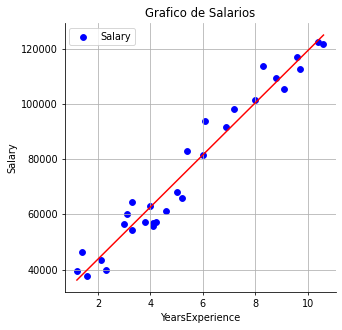

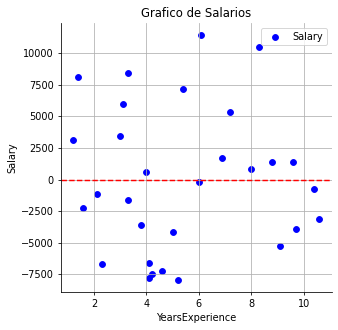

In [10]:
x=df["YearsExperience"]
y=df["Salary"]


#Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),dpi=70)
plt.scatter(x,y ,label="Salary",color="blue")
plt.title("Grafico de Salarios")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)

#3 si soporta la suposicion de linealidad paresen segir la tendecina
#Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r,_=pearsonr(x,y)

print("coeficiente de  correlacion=",r)

#Calcule el coeficiente de determinación e interprete el resultado.
print("coeficiente de determinacion=",r**2)

#Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
#dispersión.
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante)
plt.plot(x,yc,color="red")

#intervalo de confianza
print("Intervalo de confianza",modelo.conf_int(0.05))

#calculo residuales
residuales=y-yc
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),dpi=70)
plt.scatter(x,residuales,label="Salary",color="blue")
plt.axhline(y=0,color="red",linestyle="--")
plt.title("Grafico de Salarios")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)

#shapiro
from scipy.stats import shapiro
estadistico_shapiro,valor_p_shapiro=shapiro(residuales)
print(f"estadistico_shapiro={estadistico_shapiro}")
print(f"valor_p_shapiro={valor_p_shapiro}")

#broush pagan
from statsmodels.stats.api import het_breuschpagan
_,valor_p_bp,_,_=het_breuschpagan(residuales,x_constante)
print(f"valor_p_bp={valor_p_bp}")

#11 la recta de regresión para interpolar dos valores y extrapolar uno
print("x=4,y=",modelo.predict([1,4]))
print("x=8,y=",modelo.predict([1,8]))
print("x=20,y=",modelo.predict([1,20]))

#tabla anova
from statsmodels.formula.api import ols
modelo_anova=ols("Salary~YearsExperience", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_anova)
print(tabla_anova)